# Duboko Učenje - 2. laboratorijska vježba

### Ova vježba se može naći na: https://dlunizg.github.io/lab2/

In [16]:
from importlib import reload

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

import src.neural.layers as layers

## 1. Zadatak - osnovni duboki model

### 1.1 Provjera pogreške izračuna gradijenata

In [44]:
import test.check_grads as check_grads

Convolution
Check grad wrt input
Relative error =  2.6457390042007757e-08
Error norm =  2.8437201591912644e-10
Check grad wrt params
Check weights:
Relative error =  1.0749055878630334e-10
Error norm =  2.602686766045388e-10
Check biases:
Relative error =  1.615304751406738e-12
Error norm =  5.271116522937103e-11

MaxPooling
Check grad wrt input
Relative error =  3.275645251019334e-12
Error norm =  9.469905411761585e-11

ReLU
Check grad wrt input
Relative error =  3.275630079108693e-12
Error norm =  4.7814362218506103e-11

FC
Check grad wrt input
Relative error =  1.1769389562120837e-08
Error norm =  7.812320443408433e-10
Check grad wrt params
Check weights:
Relative error =  3.3976674430424308e-09
Error norm =  7.732697670161372e-10
Check biases:
Relative error =  1.636472754964992e-09
Error norm =  1.2215676579943538e-10

SoftmaxCrossEntropyWithLogits
Relative error =  3.455256172249898e-07
Error norm =  4.983159385179629e-10

L2Regularizer
Check grad wrt params
Relative error =  2.4

### 1.2 Učenje osnovnog modela

In [36]:
import src.neural.train as train
import src.neural.nn as nn
reload(nn)
reload(train)

net, loss = train.train(1)

Extracting res/data/MNIST/train-images-idx3-ubyte.gz
Extracting res/data/MNIST/train-labels-idx1-ubyte.gz
Extracting res/data/MNIST/t10k-images-idx3-ubyte.gz
Extracting res/data/MNIST/t10k-labels-idx1-ubyte.gz


/home/lumba/anaconda3/lib/python3.5/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Train accuracy = 95.36

Running evaluation:  Validation
Validation accuracy = 98.44
Validation avg loss = 0.05


Running evaluation:  Test
Test accuracy = 98.55
Test avg loss = 0.05



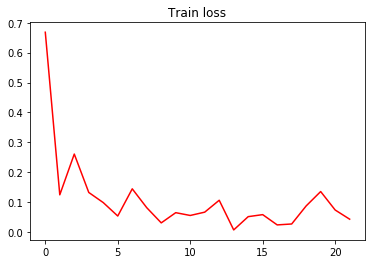

In [38]:
plt.plot(range(len(loss)), loss, 'r')
plt.title("Train loss")
plt.show()

## 2. Zadatak - regularizirani model

Extracting res/data/MNIST/train-images-idx3-ubyte.gz
Extracting res/data/MNIST/train-labels-idx1-ubyte.gz
Extracting res/data/MNIST/t10k-images-idx3-ubyte.gz
Extracting res/data/MNIST/t10k-labels-idx1-ubyte.gz


/home/lumba/anaconda3/lib/python3.5/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Train accuracy = 95.23

Running evaluation:  Validation
Validation accuracy = 98.46
Validation avg loss = 0.42


Running evaluation:  Test
Test accuracy = 98.53
Test avg loss = 0.41

Train accuracy = 98.48

Running evaluation:  Validation
Validation accuracy = 98.92
Validation avg loss = 0.34


Running evaluation:  Test
Test accuracy = 98.81
Test avg loss = 0.34

Train accuracy = 98.79

Running evaluation:  Validation
Validation accuracy = 99.00
Validation avg loss = 0.29


Running evaluation:  Test
Test accuracy = 98.82
Test avg loss = 0.28



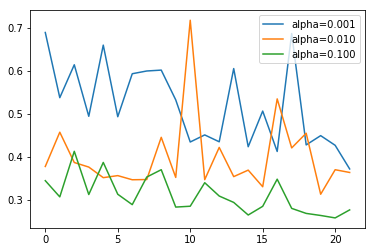

In [49]:
import src.neural.train_l2reg as train_l2reg
reload(train_l2reg)
reload(layers)

losses = []

for alpha in [1e-3, 1e-2, 1e-1]:
    net, loss = train_l2reg.train(1, alpha=alpha)
    
    plt.plot(range(len(loss)), loss, label='alpha=%.3f' % alpha)
    
plt.legend()
plt.show()

## 3. Zadataka - TensorFlow model

In [59]:
import src.tf_impl.tf_mnist_covnet as tf_covnet
import src.utils.mnist_util as utils

X_train, Y_train_, mean = utils.load_train_data()
X_val, Y_val_ = utils.load_validation_data(mean)

model = tf_covnet.TFCovnetMNIST()
model, losses = model.fit(X_train, Y_train_)

Extracting res/data/MNIST/train-images-idx3-ubyte.gz
Extracting res/data/MNIST/train-labels-idx1-ubyte.gz
Extracting res/data/MNIST/t10k-images-idx3-ubyte.gz
Extracting res/data/MNIST/t10k-labels-idx1-ubyte.gz
Extracting res/data/MNIST/train-images-idx3-ubyte.gz
Extracting res/data/MNIST/train-labels-idx1-ubyte.gz
Extracting res/data/MNIST/t10k-images-idx3-ubyte.gz
Extracting res/data/MNIST/t10k-labels-idx1-ubyte.gz


/home/lumba/anaconda3/lib/python3.5/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Train accuracy = 94.95


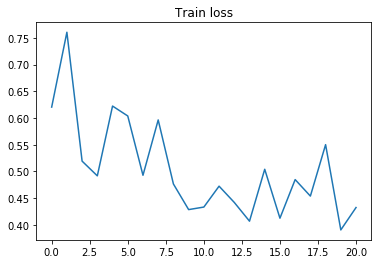


Validation:
Validation accuracy = 98.56
Validation average loss = 0.42



In [58]:
plt.plot(range(len(losses)), losses)
plt.title("Train loss")
plt.show()

model.evaluate(X_val, Y_val_)

## 4. Zadatak - CIFAR

### 4.1 Učenje konvolucijskog modela

In [4]:
import src.tf_impl.tf_covnet_cifar as covnet
import src.utils.cifar_util as utils

X_train, Y_train, X_val, Y_val_, X_test, Y_test_ = utils.load_data()

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Train error:
 accuracy = 49.82
 avg loss = 1.74

Validation error:
 accuracy = 48.76
 avg loss = 1.75

Epoch time: 108.9439377784729
Plotting in:  res/output/CIFAR/training_plot.pdf
Train error:
 accuracy = 58.29
 avg loss = 1.51

Validation error:
 accuracy = 57.10
 avg loss = 1.54

Epoch time: 106.4097068309784
Plotting in:  res/output/CIFAR/training_plot.pdf
Train error:
 accuracy = 62.92
 avg loss = 1.39

Validation error:
 accuracy = 61.32
 avg loss = 1.45

Epoch time: 106.12324380874634
Plotting in:  res/output/CIFAR/training_plot.pdf
Train error:
 accuracy = 66.78
 avg loss = 1.29

Validation error:
 accuracy = 63.98
 avg loss = 1.37

Epoch time: 109.55158686637878
Plotting in:  res/output/CIFAR/training_plot.pdf
Train error:
 accuracy = 69.38
 avg loss = 1.22

Validation error:
 accuracy = 66.34
 avg loss = 1.30

Epoch time: 116.41800570487976
Plotting in:  res/output/CIFAR/training_plot.pdf
Train error:


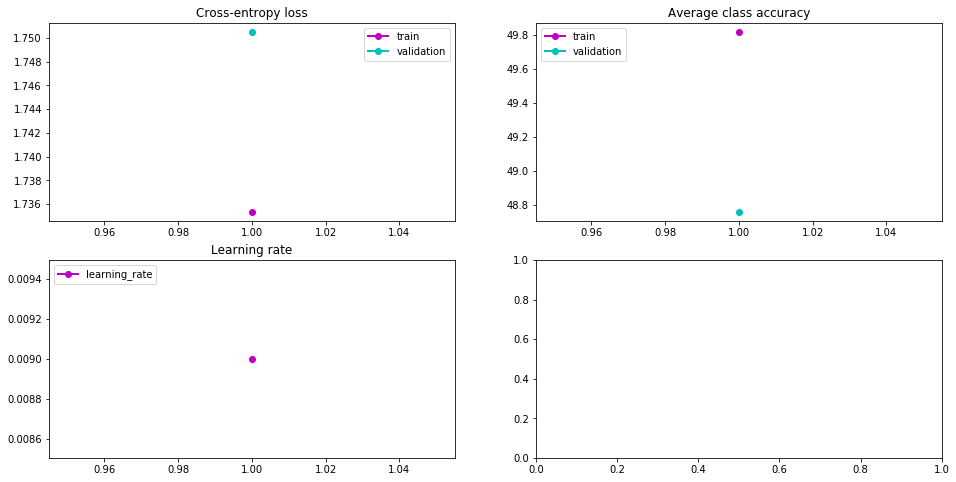

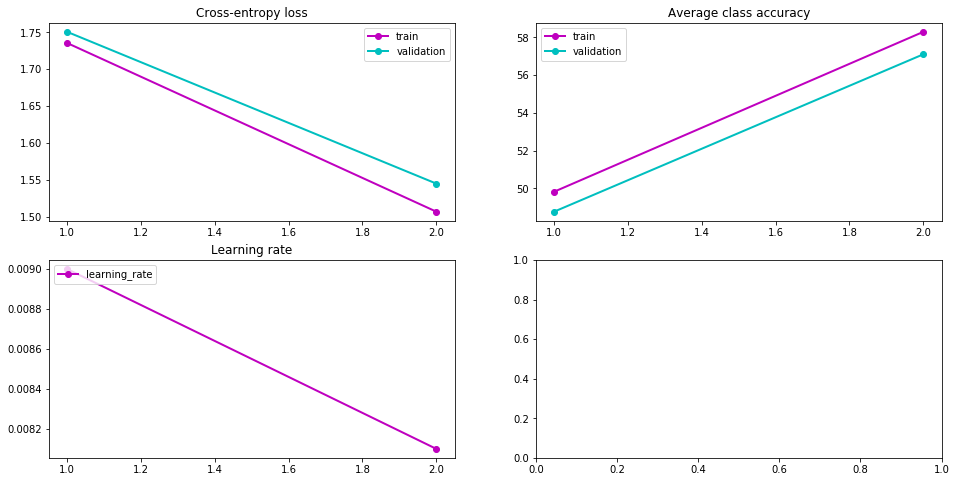

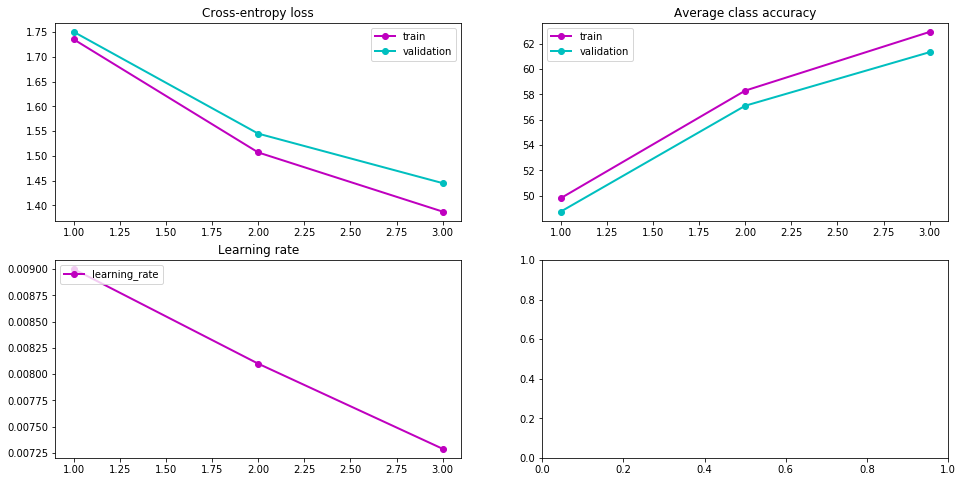

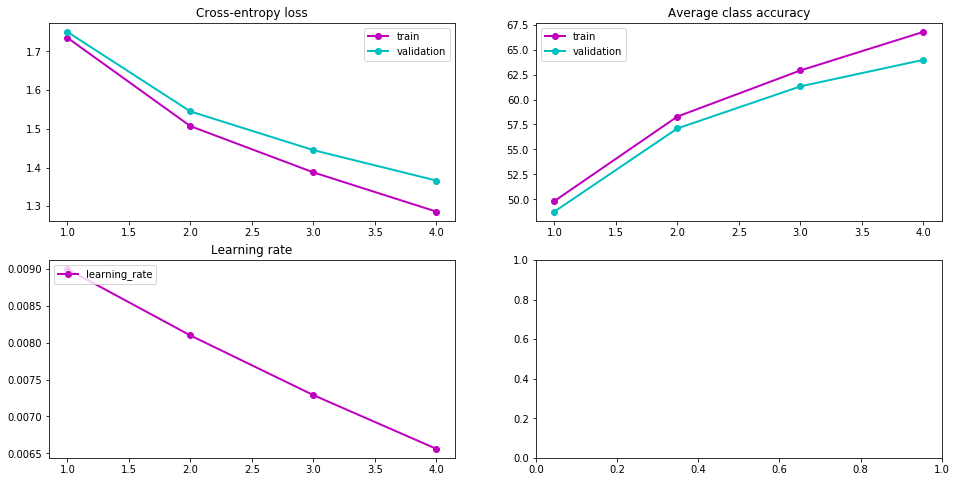

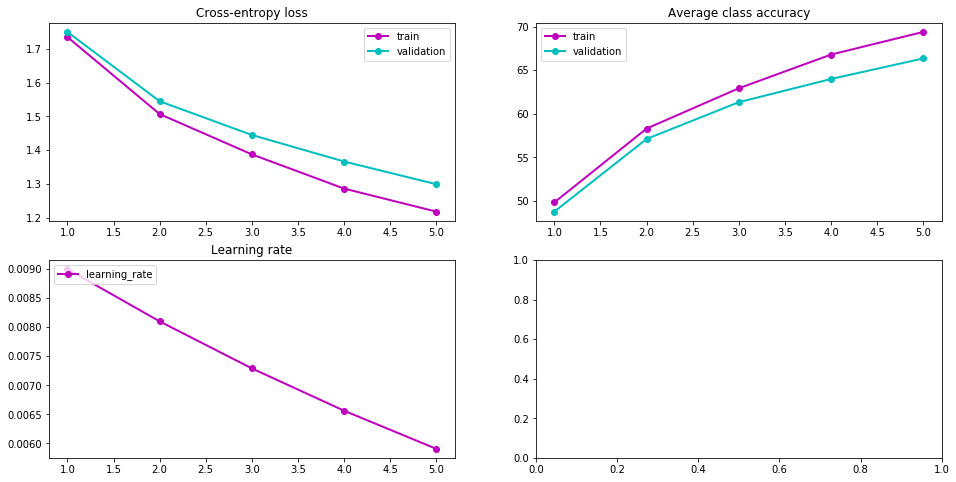

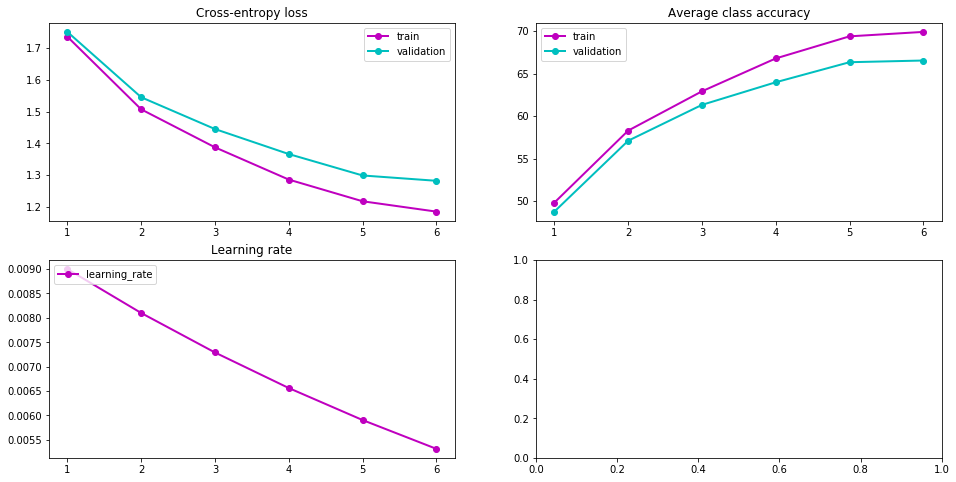

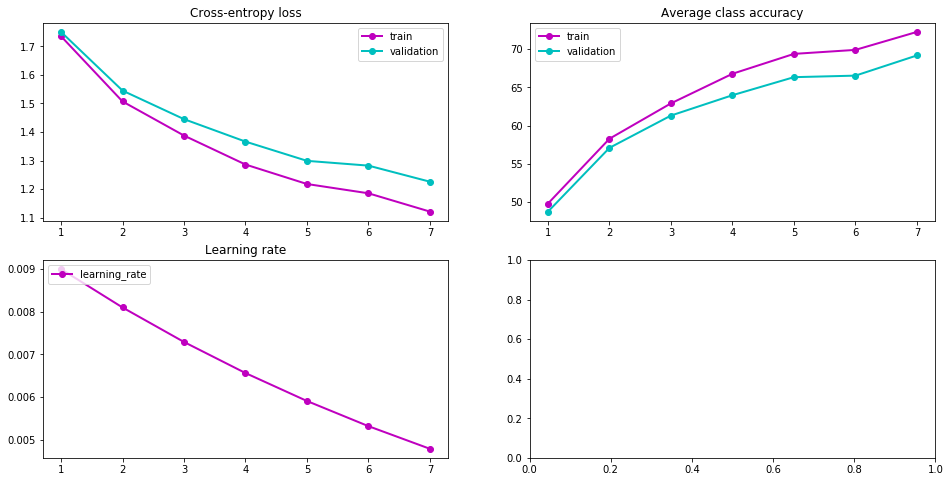

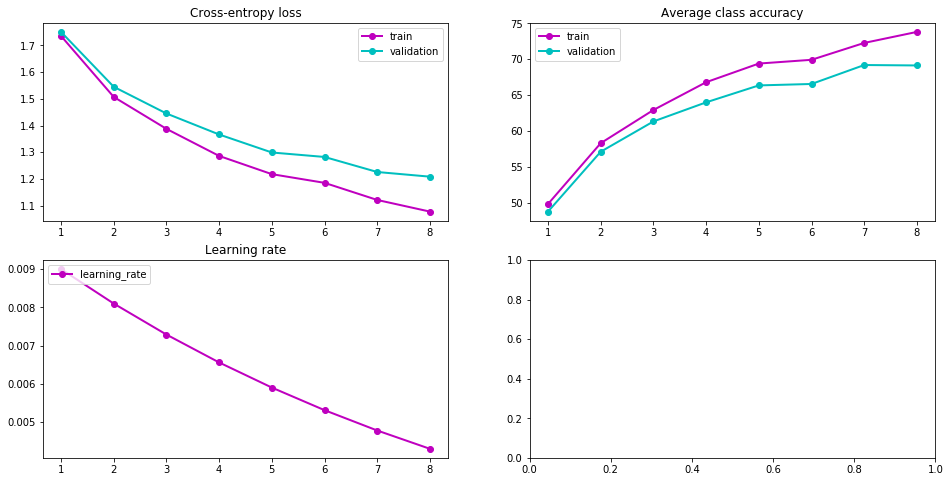

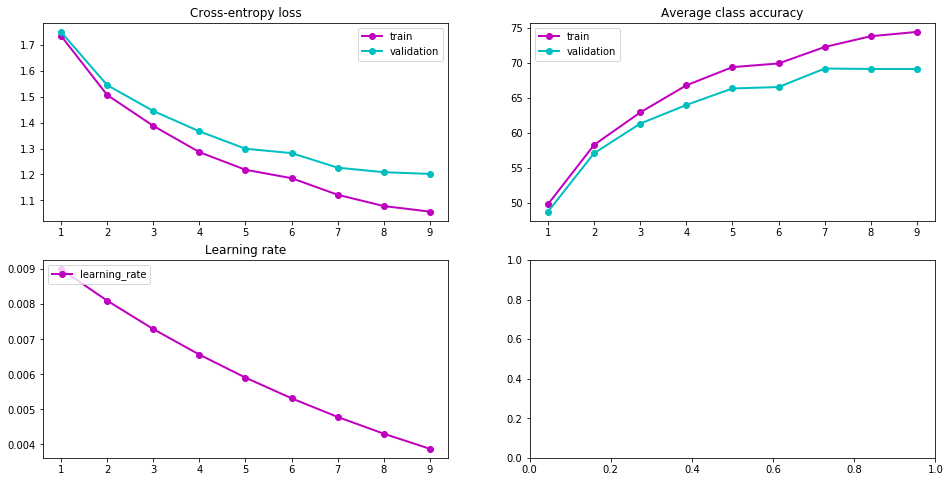

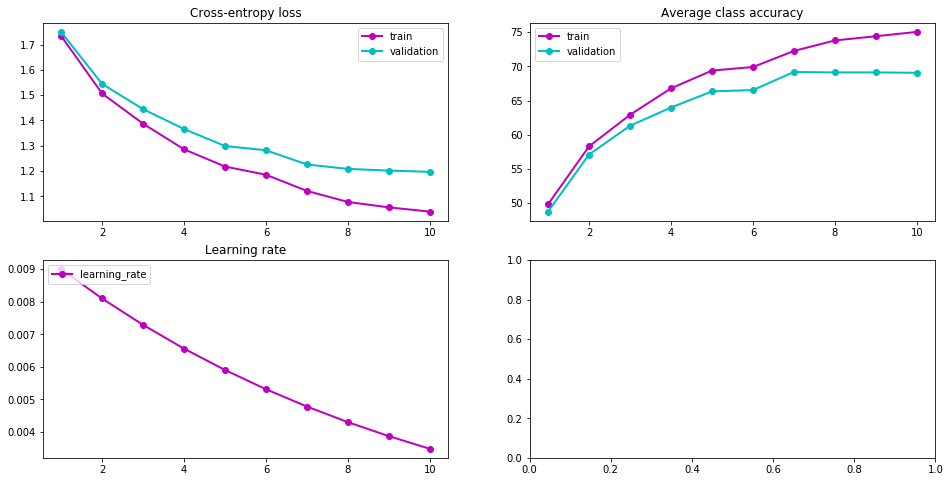

In [5]:
reload(covnet)
reload(utils)
tf.reset_default_graph()

model = covnet.TFCovnetCIFAR()
plot_data = model.fit(X_train, Y_train, X_val, Y_val_, epochs=10)

Plotting in:  res/plots/CIFAR/training_plot.pdf


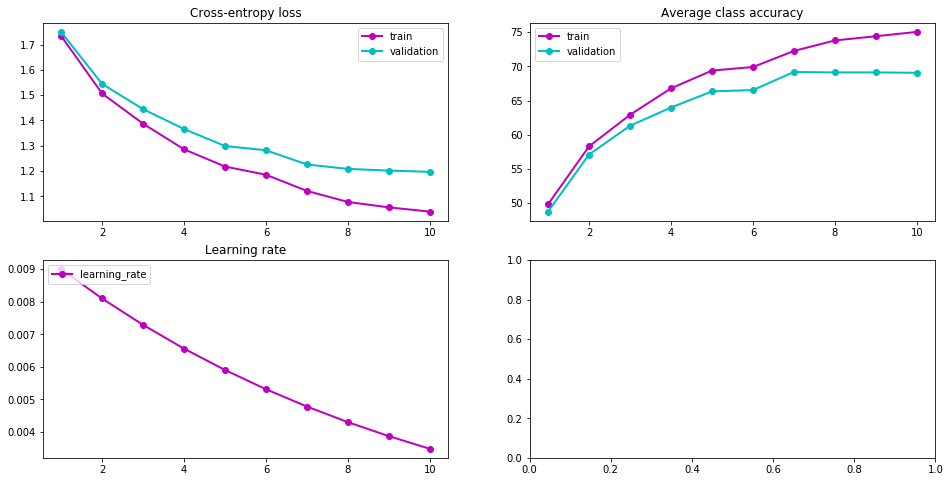

In [6]:
utils.plot_training_progress(plot_data)

### 4.2 - 20 najgore klasificiranih primjera

/home/lumba/anaconda3/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


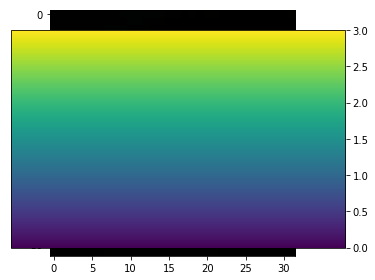

NameError: name 'test_y' is not defined

In [19]:
reload(covnet)
worst = model.worst_samples(X_test, Y_test_, 50)

class_names = [str(i) for i in range(10)]

data_mean = X_test.mean((0, 1, 2))
data_std = X_test.std((0, 1, 2))

for sample_id, l, predicted in worst:
    utils.draw_image(X_test[sample_id], data_mean, data_std)
    probas = model.session.run(tf.nn.softmax(model.logits), feed_dict={model.X: np.array([X_test[sample_id]])})
    probas = probas[0]
    predictions  = np.argsort(-probas)

    print("Correct class:", class_names[test_y[sample_id]])
    print("Predictions:", class_names[predictions[:3]], probas[predictions[:3]])